# Libraries

In [1]:
import pandas as pd
import numpy as np
import Classifications
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data

In [2]:
allall=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/SpotifyFeatures.csv')

# Cleaning Data

In [3]:
allall.drop(columns=['genre','track_id','popularity','duration_ms','key','liveness','loudness','mode','tempo','time_signature'],inplace=True)

# Applying Functions

In [4]:
allall['label_energy'] = allall['energy'].apply(Classifications.quantile_label)

In [5]:
allall['label_valence'] = allall['valence'].apply(Classifications.quantile_label)

In [6]:
allall['mode'] = allall.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

In [7]:
allall

,artist_name,track_name,acousticness,danceability,energy,instrumentalness,speechiness,valence,label_energy,label_valence,mode
0,Henri Salvador,C'est beau de faire un Show,0.61100,0.389,0.910,0.000000,0.0525,0.814,VH,VH,excited and courageous
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0.24600,0.590,0.737,0.000000,0.0868,0.816,H,VH,happy and determined
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0.95200,0.663,0.131,0.000000,0.0362,0.368,VL,L,embarassed and doubtful
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0.70300,0.240,0.326,0.000000,0.0395,0.227,L,VL,depressed and miserably uncomfortable
4,Fabien Nataf,Ouverture,0.95000,0.331,0.225,0.123000,0.0456,0.390,VL,L,embarassed and doubtful
...,...,...,...,...,...,...,...,...,...,...,...
232720,Slave,Son Of Slide,0.00384,0.687,0.714,0.544000,0.0316,0.962,H,VH,happy and determined
232721,Jr Thomas & The Volcanos,Burning Fire,0.03290,0.785,0.683,0.000880,0.0337,0.969,H,VH,happy and determined
232722,Muddy Waters,(I'm Your) Hoochie Coochie Man,0.90100,0.517,0.419,0.000000,0.1480,0.813,L,VH,hopeful and pleased
232723,R.LUM.R,With My Words,0.26200,0.745,0.704,0.000000,0.1460,0.489,H,L,distrustful and indignant


# Statistics

In [8]:
general=allall.groupby(['mode']).count()

In [9]:
general.columns

Index(['artist_name', 'track_name', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'speechiness', 'valence', 'label_energy',
       'label_valence'],
      dtype='object')

In [10]:
general.drop(columns=['artist_name', 'track_name', 'acousticness', 'danceability',
       'instrumentalness', 'speechiness', 'valence', 'label_energy',
       'label_valence'],inplace=True)

In [11]:
general.reset_index(inplace=True)

In [12]:
general.rename(columns={'energy':'count' , 'mode':'mode'},inplace=True)

In [13]:
sns.set(rc={'figure.figsize':(30,20)})

Text(0.5, 1.0, '232725 random songs')

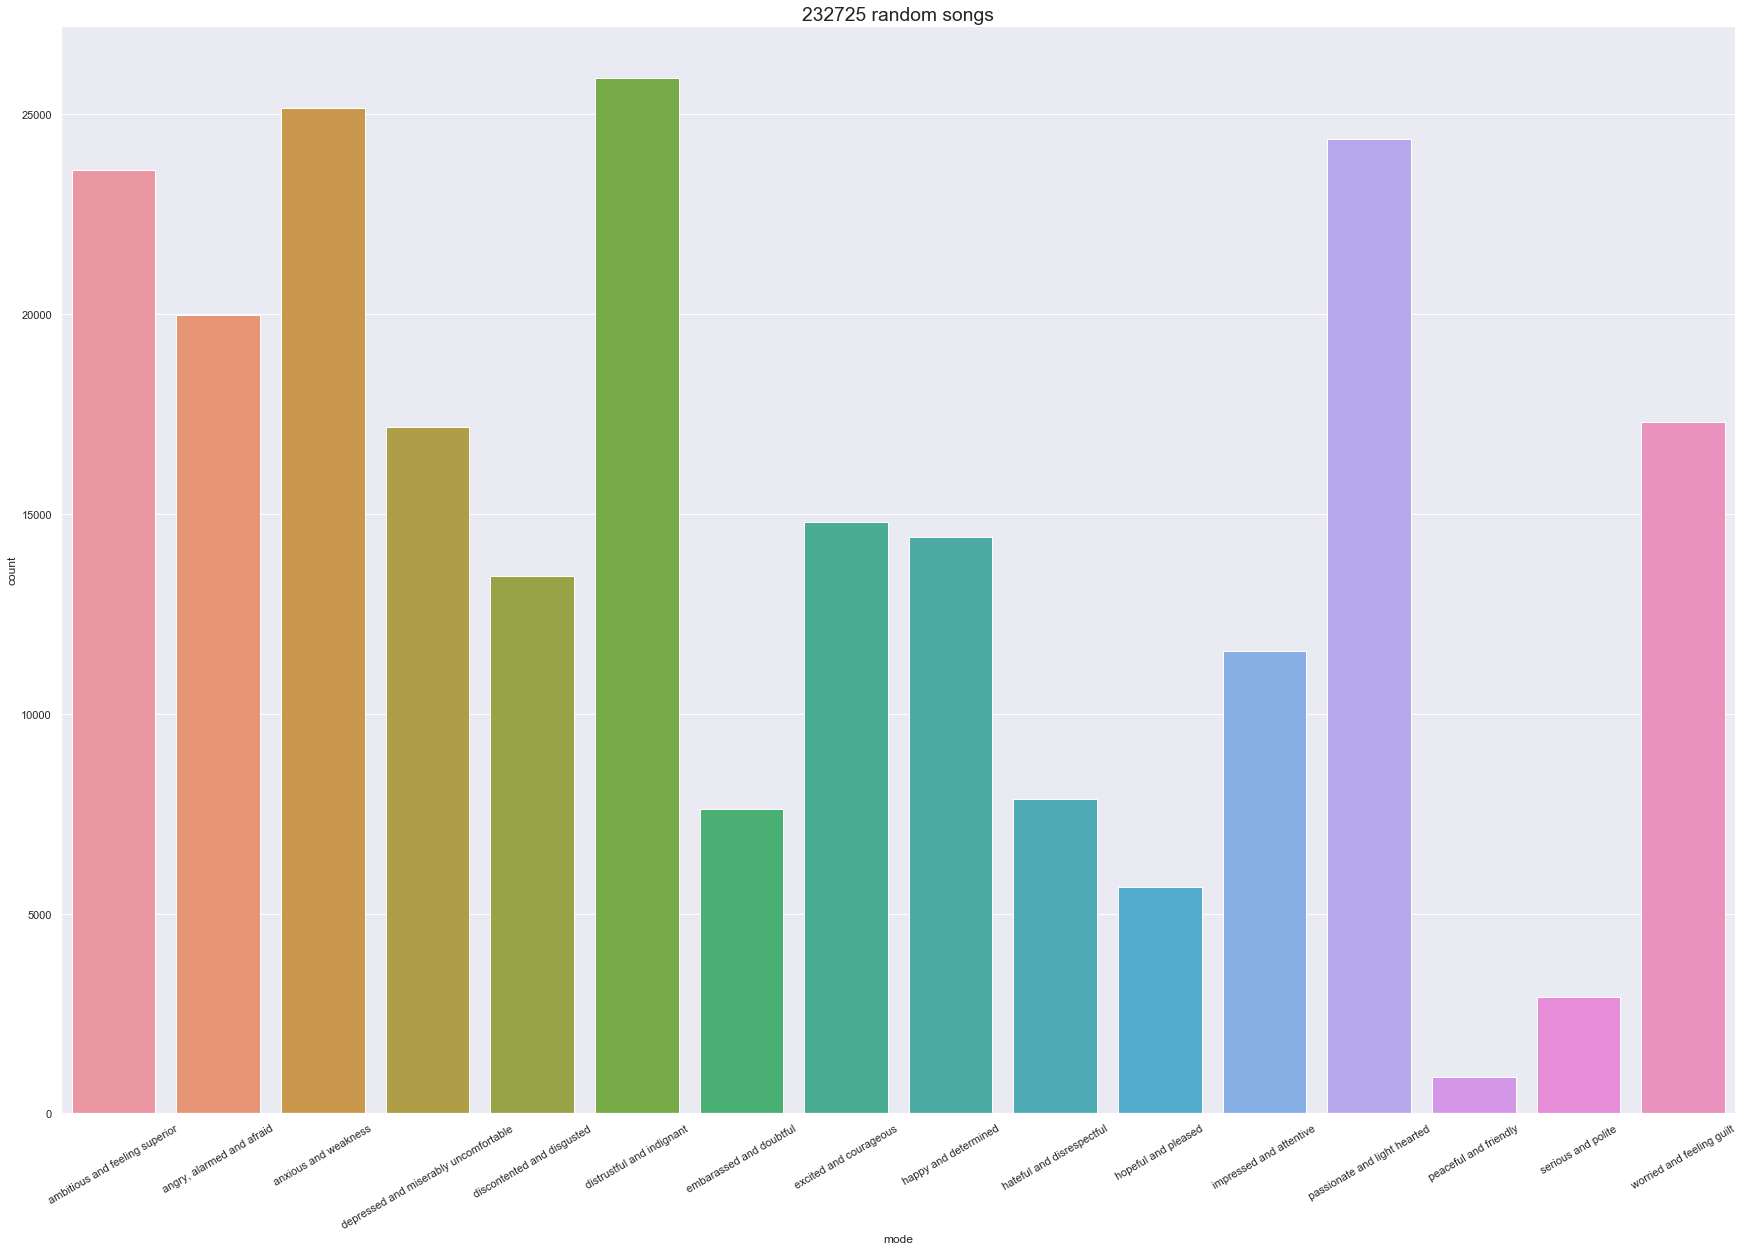

In [14]:
sns.barplot(x='mode',y='count',data=general)
plt.xticks(rotation=30)
sns.set_context("paper", font_scale=2)
plt.title('232725 random songs')

In [ ]:
plt.scatter(x='mode',y='mode',data=allall)